In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import math
from sklearn.model_selection import train_test_split
from scipy import stats


In [313]:
def kerpoly3(a,b):
    return pow(np.dot(a,b.T)+1,3)

In [396]:
def kerrbf(a,b):
    sigma=0.7
    n = a.shape[0]
    m = b.shape[0]
    ans = np.zeros((n,m))
    fac=-1/(2*pow(sigma,2))
    for i in range(n):
        for j in range(m):
            exp = np.exp(fac * (np.linalg.norm(a[i] - b[j]) ** 2))
            ans[i,j] = exp
    return ans

In [398]:
def remove_outliers(df, q=0.05):
    upper = df.quantile(1-q)
    lower = df.quantile(q)
    mask = (df < upper) & (df > lower)
    return mask

In [356]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [422]:
path='data1/data_'+str(i)+'.h5'
file=h5.File(path,'r')
X=list(file['x'])
Y=list(file['y'])
X=pd.DataFrame(X)
X.insert(2,'Y',Y)
X.iloc[:,0:2]

,0,1
0,-0.948008,0.140459
1,1.375948,0.168321
2,-0.260063,1.242541
3,1.008198,-0.885989
4,-0.452878,0.129609
5,-1.643293,0.142231
6,0.657523,-0.439358
7,1.792761,-0.645840
8,-0.845806,-0.439071
9,-1.633441,0.223454


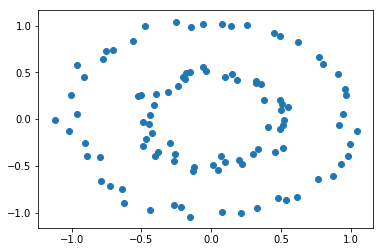

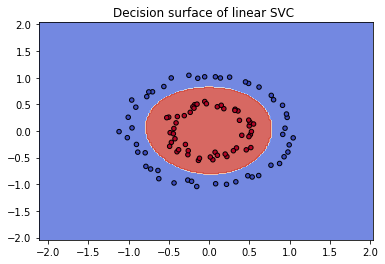

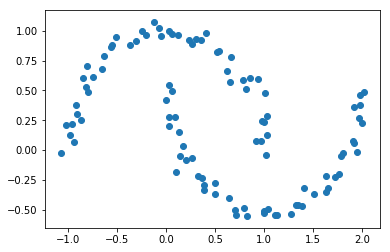

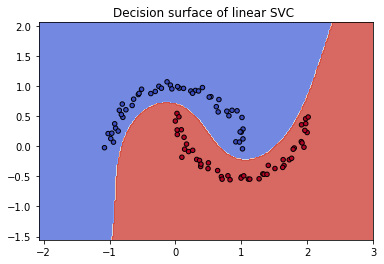

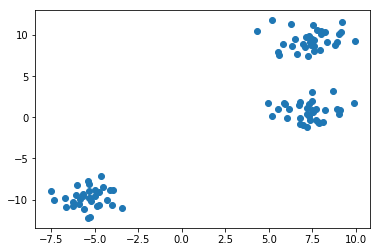

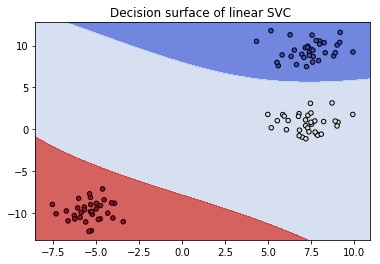

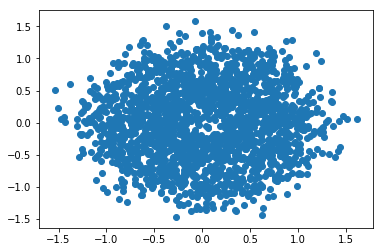

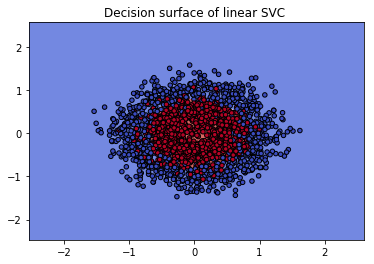

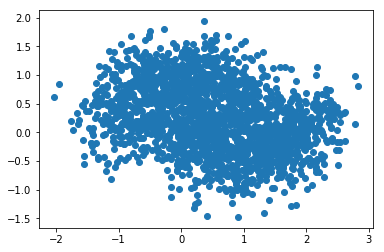

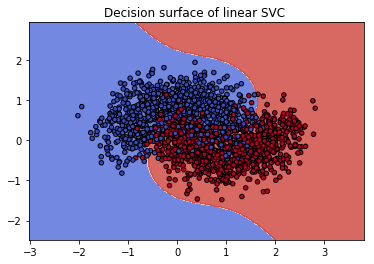

In [424]:
for i in range(1,6):
    path='data1/data_'+str(i)+'.h5'
    file=h5.File(path,'r')
    X=list(file['x'])
    Y=list(file['y'])
    X=pd.DataFrame(X)
    X.insert(2,'Y',Y)
    X=X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
    plt.scatter(X.iloc[:,0],X.iloc[:,1])
    plt.show()
    model = SVC(kernel=kerpoly)
    clf = model.fit(X.iloc[:,0:2], X['Y'])
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=X['Y'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

In [347]:
data4=h5.File('data1/data_4.h5','r')
data5=h5.File('data1/data_5.h5','r')
data=[data4,data5]

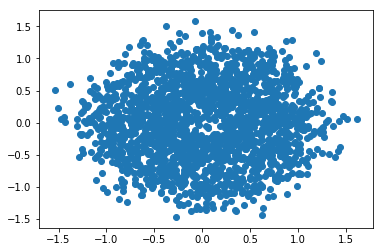

linear kernel Predictions : 
 [0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1
 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0]
Linear Kernel Accuracy : 
 0.4875
Custom RBF Kernel Predictions :
 [0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 1

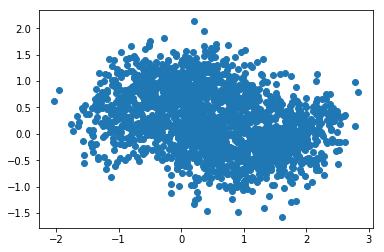

linear kernel Predictions : 
 [1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1]
Linear Kernel Accuracy : 
 0.8475
Custom RBF Kernel Predictions :
 [1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 1 1

In [397]:
for i in range(2):
    X=list(data[i]['x'])
    Y=list(data[i]['y'])
    X=pd.DataFrame(X)
    plt.scatter(X.iloc[:,0],X.iloc[:,1])
    plt.show()
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, )
    clf1=SVC(kernel='linear')
    clf1.fit(xtrain,ytrain)
    print('linear kernel Predictions : \n' ,clf1.predict(xtest))
    print('Linear Kernel Accuracy : \n',clf1.score(xtest,ytest))
    clf2=SVC(kernel=kerrbf)
    clf2.fit(xtrain,ytrain)
    print('Custom RBF Kernel Predictions :\n',clf2.predict(xtest))
    

    
    print('Custom RBF Kernel Accuracy :\n',clf.score(xtest,ytest))